In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
# from matplotlib import rc

In [2]:
df={}
for i in range(1998,2019):
    df["Year_"+str(i)]=pd.read_csv("CalgaryData/287527_51.01_-113.94_%d.csv"%i,skiprows=2,low_memory=False)


In [3]:
Cal_sol=pd.concat(df,ignore_index=True)

In [4]:
Data_legend=pd.read_csv("CalgaryData/287527_51.01_-113.94_1998.csv",nrows=1)

In [5]:
Cal_sol['Date Time']=pd.to_datetime(Cal_sol[['Year', 'Month','Day','Hour','Minute']])

In [6]:
Cal_sol=Cal_sol.drop(columns='Unnamed: 14')

In [7]:
Cal_sol.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'Cloud Type',
       'Dew Point', 'Surface Albedo', 'Wind Speed', 'Relative Humidity',
       'Temperature', 'Pressure', 'Date Time'],
      dtype='object')

In [8]:
m_data=Cal_sol.groupby(["Year", "Month"])
monthly_averages = m_data.aggregate({"DNI":np.mean,"DHI":np.mean,"Temperature":np.mean})

In [9]:
monthly_averages.reset_index(inplace=True) 

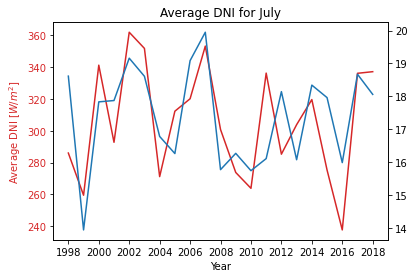

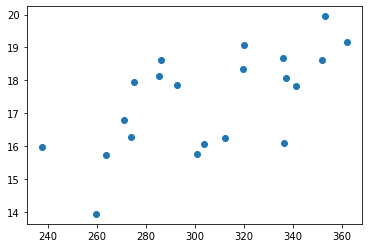

In [18]:
# rc('text', usetex=True)
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
month=7
fig,ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel(r'Average DNI [$W/m^2 $]', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(np.arange(1998,2019,2))

ax1.plot(monthly_averages[monthly_averages['Month']==month].Year,monthly_averages[monthly_averages['Month']==month].DNI, color=color)

ax2 = ax1.twinx()
ax2.plot(monthly_averages[monthly_averages['Month']==month].Year,monthly_averages[monthly_averages['Month']==month].Temperature)

plt.title('Average DNI for %s'%Months[month-1])
plt.show()

fig, plt.subplot()
plt.scatter(monthly_averages[monthly_averages['Month']==month].DNI,monthly_averages[monthly_averages['Month']==month].Temperature)